# Renye Transfer Entropy Calculation

This notebook consist of following activity:

1. Function: KNN nearest neighbour method to estimate the probabailty distribution
2. Function: Calculation of kth nearest distance of any provided dataset
3. Function: Calcuation of Reny Entropy
4. Calcuation: RE of probability distributions: Normal Distribution
5. Calcuation: RE of probability distributions: Cauchy Distribution
5. Calcuation: RE of probability distributions: Student-t Distribution

In [1]:
#import
import numpy as np
from scipy.special import gamma,psi
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

## 1 KNN nearest neighbour method to estimate the probabailty distribution

* Function to calculate the kth nearest neighbour distance by considering the Euclidian style distance.

In [2]:

# Get the k nearest neighbors between points in a random variable/vector.
# Uses Euclidean style distances.
'''
Arguments: 
X -> list of point[x1, x1,..] or points [[x1, x1], [x2, y2], ...]
k -> integer, the nearest value desired
D -> is the distance, can be used to make the threshold cut-off in distance

Returns:
knn -> A dictationary with place_value(points) as key and 
'''
def k_nearest_neighbors(X, k=1, D=1):
    #length
    nX = len(X)
    #initialize knn dict
    knn = {key: [] for key in range(nX)}
    #make sure X has the right shape for the cdist function
    X = np.reshape(X, (nX,-1))
    dists_arr = cdist(X, X)
    distances = [[i,j,dists_arr[i,j]] for i in range(nX-1) for j in range(i+1,nX)]
    #sort distances
    distances.sort(key=lambda x: x[2])
    #pick up the k nearest
    for d in distances:
        i = d[0]
        j = d[1]
        dist = d[2]
        if dist < D:
            if len(knn[i]) < k:
                knn[i].append([j, dist])
            if len(knn[j]) < k:
                knn[j].append([i, dist])
    return knn



## 2 KNN nearest neighbour distance calculation

* Function to calculate the distance for the provided kth nearest neighbour 

In [3]:
 """Returns the distance for the kth nearest neighbor of each point.

   Args:
        X (np.array): A random variable of form X = {x_1, x_2, x_3,...,x_N} or
            a random vector of form X = {(x_1, y_1), (x_2, y_2),...,(x_N,
            y_n)}.
        k (Optional[int]): The number of nearest neighbors to check for each
            point. Defaults to 1.
    Returns:
        list: A list in same order as X with the distance value to the kth
        nearest neighbor of each point in X.

    """
 

def kth_nearest_neighbor_distances(X, k=1):
    nX = len(X)
    # make sure X has the right shape for the cdist function
    X = np.reshape(X, (nX,-1))
    dists_arr = cdist(X, X) # creates a distance matrix with all the distances between every points as elements
    dists_arr.sort() #sort the distances (rows) in ascending order
    return [dists_arr[i][k] for i in range(nX)] #call for the required distance(value) in the distance matrix 


## 3 Calculation of Renyi Entropy

*Python Function to calculate the Renyi Entropy for the provided kth nearest neighbour *

The estimator has been adopted from following article (section 3.1) (https://arxiv.org/abs/0810.5302#:~:text=A%20class%20of%20R%C3%A9nyi%20information%20estimators%20for%20multidimensional%20densities,-Nikolai%20Leonenko%2C%20Luc&text=A%20class%20of%20estimators%20of,i.i.d.%20vectors%20with%20distribution%20f.)

1. Firstly calculate: $ \zeta_{(N, i, k)}$ as follows:

$$\zeta_{(n, i, k)} =  (n-1) C_{k} V_{d} (\rho_{k}^{(i)}, _{(n-1)})^{d} $$

where: 

$$V_{d}  = \frac {\pi^{d/2}}  {\Gamma{(d/2 + 1)}}$$

is the volume of the unit ball $B(0, 1)$ in $R^{d}$

$$ C_{k} = \left[ \frac {\Gamma{(k)}} {\Gamma {(k + 1 - alpha)}} \right] $$


2. Secondly calculate $I_{(n, k, alpha)}$ as follows:

$$ I_{(n, k, alpha)} = \frac {1}{n} \sum_{i = 1}^{n} \zeta_{(n, i, k)} $$


3. Thirdly estimate the Renyi Tallis Entropy as follows:

$$ H_{(n, k, alpha)} = \frac {1}{1-alpha}  log(I_{(n, k, alpha)} )$$

In [4]:
# Estimation of Renyi Entropy by using above formula

"""
   Args:
        X (np.array): A random variable of form X = {x_1, x_2, x_3,...,x_N} or
            a random vector of form X = {(x_1, y_1), (x_2, y_2),...,(x_N,
            y_n)}.
       alpha [int] : the alpha parameter of RE
        k (Optional[int]): The number of nearest neighbors to check for each
            point. Defaults to 1.
        
    Returns:
        array: Aa array of thus calculated Renyi Entropy.
"""
def RE_estimate(X, alpha, k, kth_dists=None): #output an array for all the values of i in X
    r_k = kth_dists # the kth nearest neighbor distances
    if kth_dists is None:
        r_k = kth_nearest_neighbor_distances(X, k=k)
        
    n = len(X) # length
    #a = 1.0-alpha #dummy a
    d = 1 #dimension
    if len(X.shape) == 2:
        d = X.shape[1]
    # volume of unit ball in R^d
    V_d = np.pi**(0.5*d)/gamma(0.5*d + 1.0) # output numpy.float64
    #Ck
    C_k = (gamma(k)/gamma(k + 1-alpha))**(1/(1-alpha)) # output list
    #zeta
    zeta_n_i_k = (n-1) * np.array(C_k) * V_d * np.array(r_k)**d
    #I
    I_n_k_alpha = (1/n) * np.sum(np.array(zeta_n_i_k)**(1-alpha))
    #RE estimate
    RE = np.log2(I_n_k_alpha)/(1-alpha) 
    return RE

## 4: Renye Entropy: Normal Distribution

1. RE Estimates for Univariate Normal Distribtuon


In [14]:
# Initialize the dataset for Univariate normal distibution
N = np.random.normal(0,1,10000) # numpy.ndarray
N = np.reshape(N, (len(N), -1))
#n = len(N)
#calculate the RE estimates
alphas = np.arange(0.1,4,0.04) #defining alphas upto  alpha< k + 1
RE_est = [ RE_estimate(N, alpha, k=5, kth_dists=None) for alpha in alphas]   


2. RE analytically calculated for Normal Distribution


In [15]:
"""
# In order to analytically calculate the RE for Gaussian distribution, the equation is adopted from the 
master thesis (Tabochavo et. al) (Section: 2.1.5) 
"""

#cov = [[1, 0], [0, 1]]  # diagonal covariance
cov = [[1]]
def RE_analytical(N, alpha):
    RE = np.log2((2*np.pi)**(N/2)* (np.linalg.det(cov))**0.5) + (1/(1-alpha))*np.log2(alpha**(-N/2))
    return RE

alphas = np.arange(0.1,4,0.04) #defining alphas
RE_analy = [RE_analytical(1,alpha) for alpha in alphas] #calculating RE for all alphas and assigning it to a object


plot

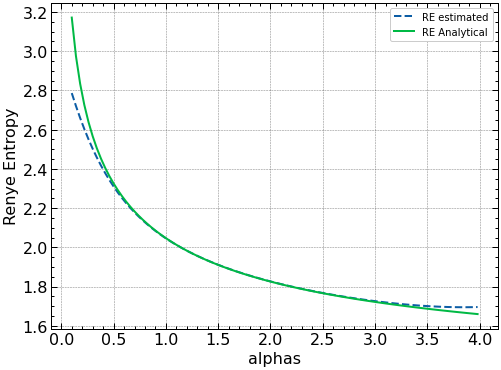

In [16]:
# plot RE estimates
plt.plot(alphas, RE_est, '--', label = 'RE estimated')

#plot RE analytical
plt.plot(alphas, RE_analy, label = 'RE Analytical')

plt.xlabel('alphas')
plt.ylabel('Renye Entropy')
plt.legend(loc = 'upper right', fontsize = 10)

## 5: Renye Entropy: Cauchy Distribution

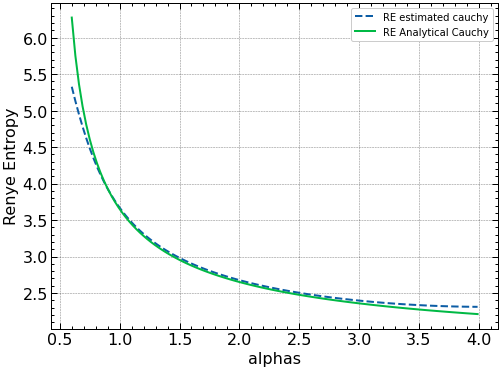

In [17]:
# RE Estimates for Cauchy distribution
N = np.random.standard_cauchy(2000) 
N = np.reshape(N, (len(N), -1))
alphas = np.arange(0.6,4,0.03) #defining alphas as alpha<k + 1 and above 0.5

RE_est_cauchy = [ RE_estimate(N, alpha, k=5, kth_dists=None) for alpha in alphas]   

# Analytical solution for cauchy distribution
def RE_analytical_cauchy(alpha):
    RE = np.log2((1/np.pi ** (alpha-0.5)) * gamma(alpha-0.5)/gamma(alpha)) * (1/(1-alpha))
    return RE

RE_analy_cauchy = [RE_analytical_cauchy(alpha) for alpha in alphas]

#plot
plt.plot(alphas, RE_est_cauchy, '--', label = 'RE estimated cauchy')
plt.plot(alphas, RE_analy_cauchy, label = 'RE Analytical Cauchy')
plt.xlabel('alphas')
plt.ylabel('Renye Entropy')
plt.legend(loc = 'upper right', fontsize = 10)

## 6: Renye Entropy : Student -t Distribution

In [ ]:
# RE Estimates for student t distribution
N = np.random.standard_t(10, size=1000) #with 10 degree of freedom
N = np.reshape(N, (len(N), -1))
alphas = np.arange(0.6,4,0.03) #defining alphas as alpha<k + 1 and above 0.5

RE_est_cauchy = [ RE_estimate(N, alpha, k=5, kth_dists=None) for alpha in alphas]   

# Analytical solution for cauchy distribution
def RE_analytical_cauchy(alpha):
    RE = np.log2((1/np.pi ** (alpha-0.5)) * gamma(alpha-0.5)/gamma(alpha)) * (1/(1-alpha))
    return RE

RE_analy_cauchy = [RE_analytical_cauchy(alpha) for alpha in alphas]

#plot
plt.plot(alphas, RE_est_cauchy, '--', label = 'RE estimated cauchy')
plt.plot(alphas, RE_analy_cauchy, label = 'RE Analytical Cauchy')
plt.xlabel('alphas')
plt.ylabel('Renye Entropy')
plt.legend(loc = 'upper right', fontsize = 10)